# 7. Regularization

## 7-1. 들어가며

### 학습 목표
---
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

### 목차
---
1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization

## 7-2. Regularization과 Normalization

### Regularization(정칙화)
---
정칙화라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나입니다. 오늘 우리가 가장 중요하게 다룰 주제이기도 하지요. L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상을 말합니다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞히지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠습니다. 더 좋은 결과를 얻기 위해서는 새로운 시험, 즉 test set에서도 잘 맞혀야겠죠? 그래서 regularization 기법들은 모델에 제약 조건을 걸어서 모델의 train loss를 증가시키는 역할을 합니다. 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종 test loss를 감소시키려는 목적을 가지고 있지요.

### Normalization(정규화)
---
정규화라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24)의 값이 들어가는 경우, 데이터의 분포가 피처(feature) 값의 범위에 의해 왜곡되어 학습에 방해가 된다는 문제가 있습니다. normalization은 모든 피처 값의 범위를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

이 두 가지 단어는 한국어로 번역 시에 혼용하여 쓰기도 하므로, 앞으로 이번 노드에서는 주로 영어로 표기하도록 하겠습니다. 핵심을 정리하면, regularization은 오버피팅을 막고자 하는 방법, normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것입니다.

Regularization와 Normalization의 간단한 예제를 Iris dataset의 회귀 문제를 풀면서 비교해 보겠습니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


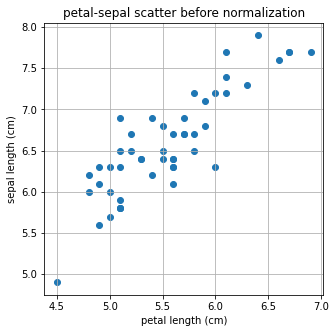

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

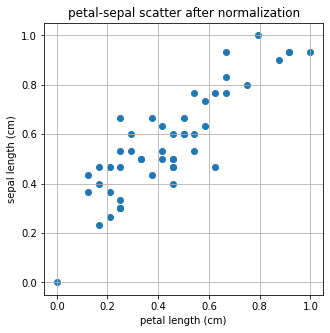

In [4]:
# minmax_scale을 통해 0-1로 normalization


from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 regularization에 대해 알아보겠습니다.

sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링해 보겠습니다. 이 sklearn.linear_model에는 L1, L2 regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠습니다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어집니다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


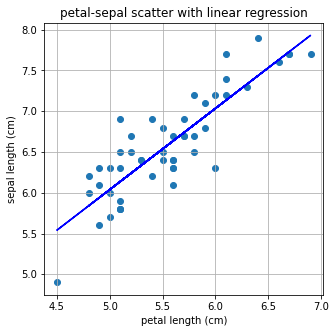

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


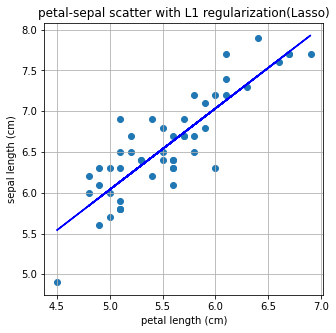

In [10]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X, Y)
plt.plot(X, linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


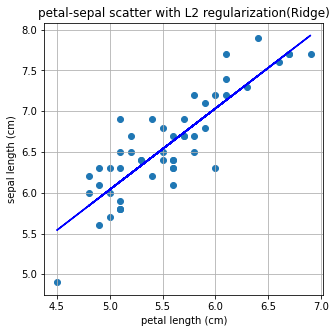

In [11]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X, Y)
plt.plot(X, linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## 7-3. L1 Regularization

이전 스텝에서 regularization과 normalization의 정의를 설명하고, L1/L2 regularization을 코드로 맛보기 해보았습니다. 마지막에 같은 linear regression 문제를 푸는데 L1 regularization에서는 문제가 풀리지 않았다는 것을 기억하시나요?

L1 regularization을 설명하면서, 지난 스텝에서 Lasso로는 regression 문제가 제대로 풀리지 않았던 현상을 더 자세히 알아보겠습니다. 그리고 어떤 때에 L1 regularization을 사용하는지 알아보는 것이 목표입니다!

### L1 regularization (Lasso)의 정의
---
L1 regularization은 아래와 같은 식으로 정의됩니다. (N: 데이터의 개수, D: 데이터의 차원(feature의 개수))
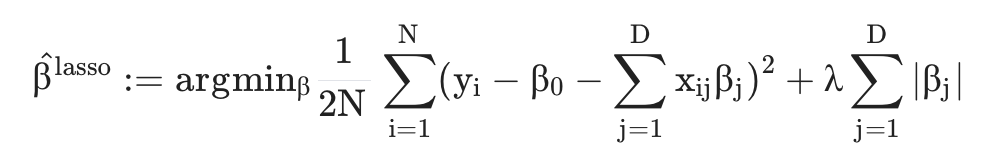
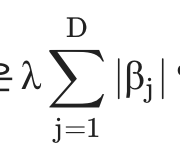
이 부분이 없다면 linear regression과 동일합니다.

이 부분이 바로 L1 norm에 해당하는 부분인데, L1 regularization이라는 이름이 붙은 이유이기도 하고, L2 regularization과의 차이가 나타나는 중요한 부분입니다.

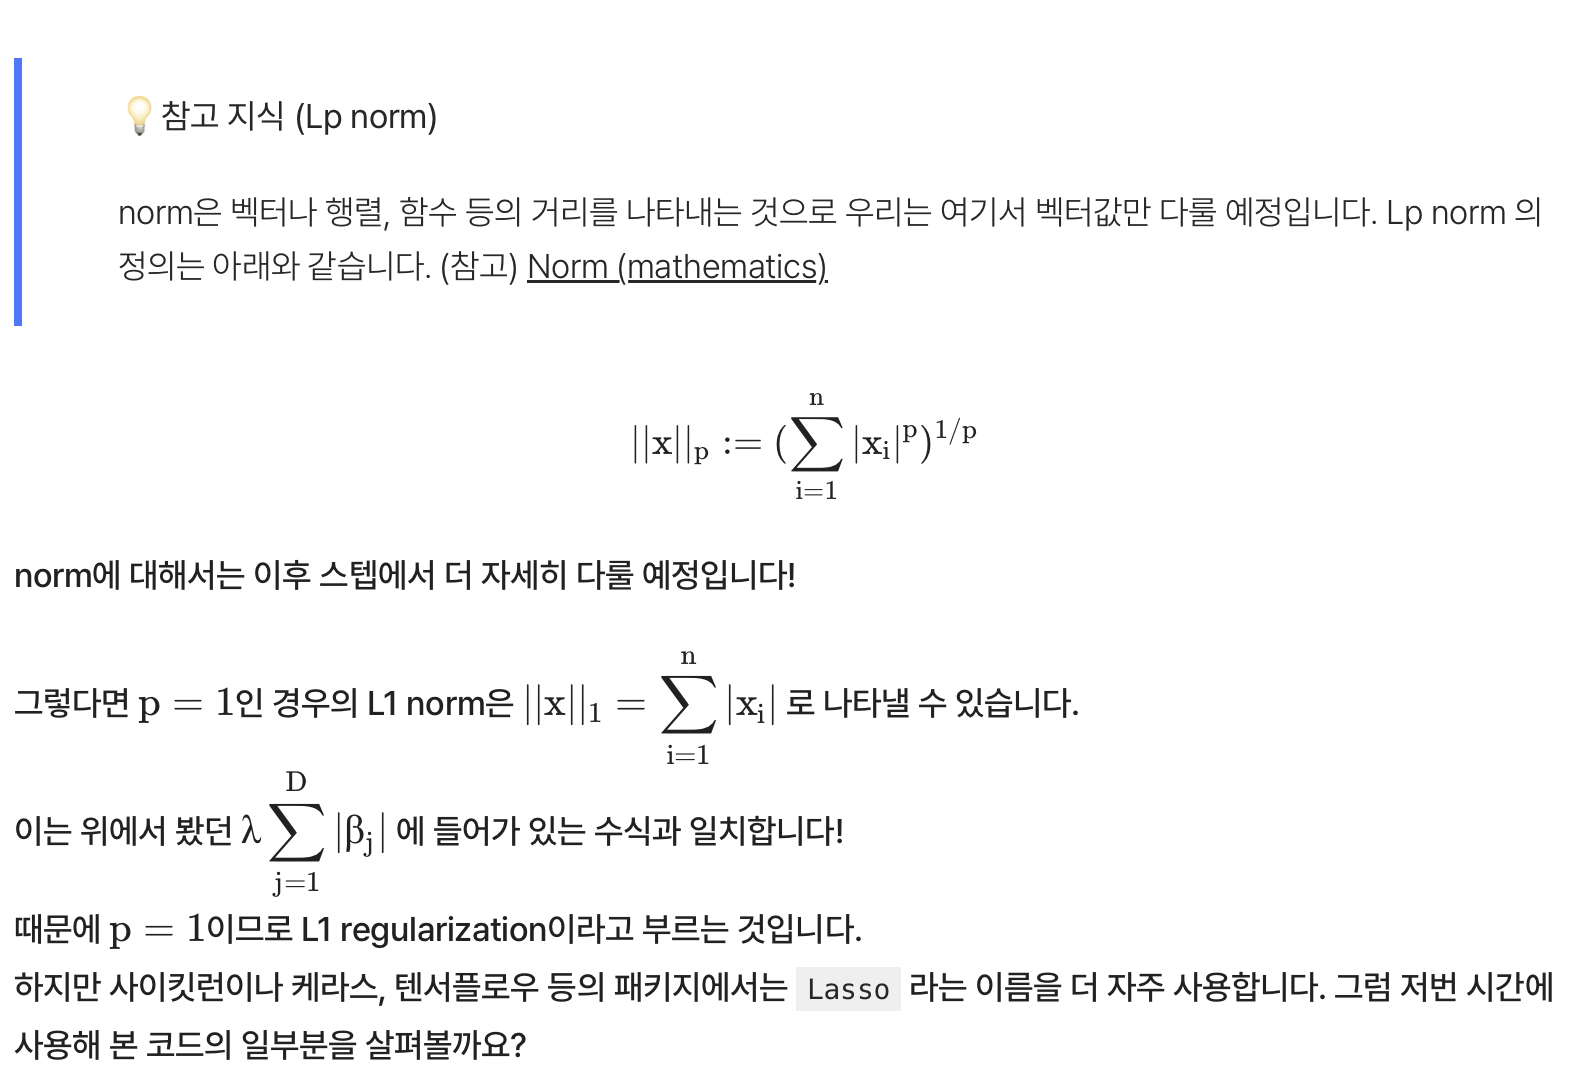

In [12]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


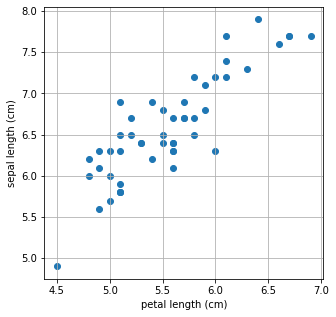

In [13]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


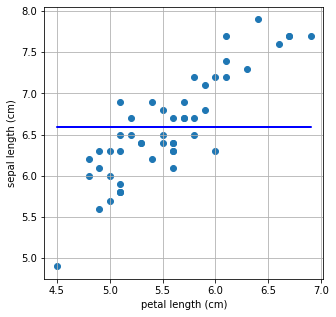

In [14]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교
---
Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 wine dataset을 이용해 보겠습니다.
총 13개의 특성을 갖는 데이터입니다.

In [15]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [16]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해 보겠습니다.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


이번에는 L1 regularization으로 문제를 풀어보겠습니다.

In [19]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = model.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(model.coef_)

Result of Lasso
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient of Lasso
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


### 결과 분석
---
coefficient 부분을 보시면 linear regression과 L1 regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. linear regression에서는 모든 컬럼의 가중치가 0이 아닌 값을 가지고 있지만, L1 regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 linear regression과 L1, L2 regularization의 차이 중 하나는 하이퍼파라미터(수식에서는 λ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.